In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import torch

DTYPE = torch.float32

import matplotlib
matplotlib.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "serif"

In [2]:
import matplotlib as mpl
cmap = 'Spectral'
num_colors=3
# Create a colormap
cmap = plt.get_cmap(cmap)
colors = [cmap(i) for i in np.linspace(0, 1, num_colors)]
colors=colors[:num_colors//4]+colors[3*num_colors//4:]
print(len(colors))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 14

1


In [3]:
def extract_val_losses(file_path):
    # Compile a regular expression to match the Val Loss value
    val_loss_pattern = re.compile(r'Val Loss: (\d+\.\d+e[+-]\d+)')
    
    val_losses = []  # List to hold all Val Loss values
    with open(file_path, 'r') as file:
        for line in file:
            # Search for the Val Loss pattern in each line
            match = val_loss_pattern.search(line)
            if match:
                # If a match is found, convert the string to a float and append to the list
                val_losses.append(float(match.group(1)))
    
    # Convert the list of Val Losses to a NumPy array and return it
    return np.array(val_losses)

def extract_Variances(file_path):
    # Compile a regular expression to match the Val Loss value
    val_loss_pattern = re.compile(r'var\(R\): (\d+\.\d+e[+-]\d+)')
    
    val_losses = []  # List to hold all Val Loss values
    with open(file_path, 'r') as file:
        for line in file:
            # Search for the Val Loss pattern in each line
            match = val_loss_pattern.search(line)
            if match:
                # If a match is found, convert the string to a float and append to the list
                val_losses.append(float(match.group(1)))
    
    # Convert the list of Val Losses to a NumPy array and return it
    return np.array(val_losses)

def extract_KL(file_path):
    # Compile a regular expression to match the Val Loss value
    val_loss_pattern = re.compile(r'snr: (\d+\.\d+e[+-]\d+)')
    
    val_losses = []  # List to hold all Val Loss values
    with open(file_path, 'r') as file:
        for line in file:
            # Search for the Val Loss pattern in each line
            match = val_loss_pattern.search(line)
            if match:
                # If a match is found, convert the string to a float and append to the list
                val_losses.append(float(match.group(1)))
    
    # Convert the list of Val Losses to a NumPy array and return it
    return np.array(val_losses)

In [6]:
file_path_ls = ["./Output/vanilla-12233816.out", 
                "./Output/rba_sample-12241757.out",
                "./Output/vrba_sample-12241788.out"]
                
legend_ls    = ["Uniform","RBA",'vRBA']
color_ls     = ["red", "orange",'green']

val_loss_ls = []
Var_ls = []
KL_ls = []

for i in range(len(file_path_ls)):
    file_path = file_path_ls[i]
    val_loss_ls.append(extract_val_losses(file_path))
    Var_ls.append(extract_Variances(file_path))
    KL_ls.append(extract_KL(file_path))


Data will be saved in: /users/jdtoscan/data/jdtoscan/PIML/Crunch_PIML/vRBA/all_results
Data for 'Uniform' saved to /users/jdtoscan/data/jdtoscan/PIML/Crunch_PIML/vRBA/all_results/TC_UNet_Uniform.mat
Data for 'RBA' saved to /users/jdtoscan/data/jdtoscan/PIML/Crunch_PIML/vRBA/all_results/TC_UNet_RBA.mat
Data for 'vRBA' saved to /users/jdtoscan/data/jdtoscan/PIML/Crunch_PIML/vRBA/all_results/TC_UNet_vRBA.mat


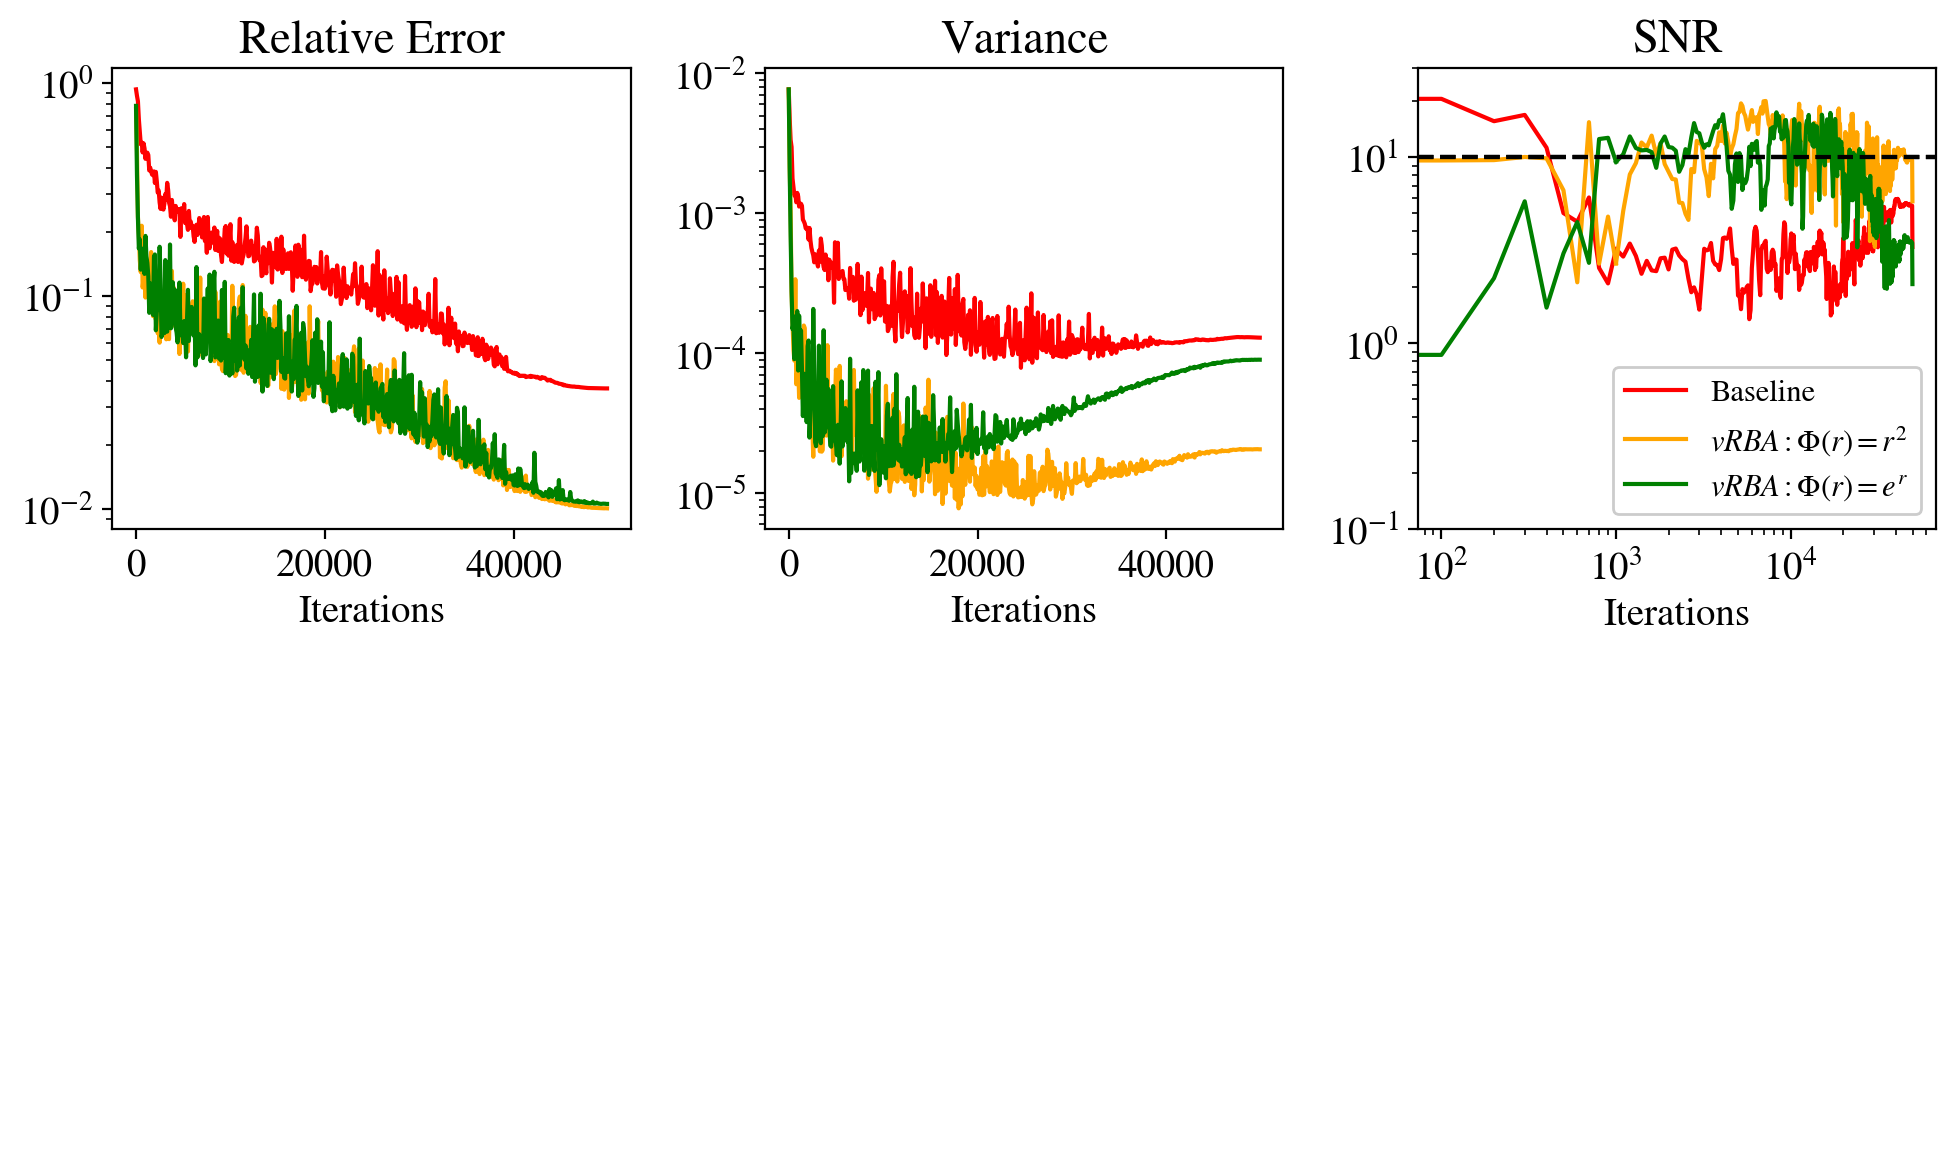

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.io
import os

# Note: The variables `legend_ls`, `val_loss_ls`, `Var_ls`, 
# and `KL_ls` are assumed to be defined in your environment.

# --- Global style settings for compatibility ---
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 14

# --- MODIFICATION: Data Saving Setup ---
save_path = "/users/jdtoscan/data/jdtoscan/PIML/Crunch_PIML/vRBA/all_results"
# Ensure the save directory exists
os.makedirs(save_path, exist_ok=True)
print(f"Data will be saved in: {save_path}")

# --- Reusable Plotting Function for one Row ---
def plot_wave_equation_row(axes_row):
    """Plots the Wave Equation data and saves the raw data to .mat files."""

    # --- USER-ADJUSTABLE PARAMETERS ---
    moving_average_window = 5
    smoothing_start_iter = 1000
    batch_size_scaler = 100

    # Loop through each method/key to plot its results
    for i, key in enumerate(legend_ls):
        
        # --- MODIFICATION: Data Extraction and Saving ---
        # Get the full, unmasked data arrays first
        iterations = (np.arange(len(val_loss_ls[i])) * batch_size_scaler)
        relative_error = np.array(val_loss_ls[i])
        variance = np.array(Var_ls[i])
        snr = np.array(KL_ls[i])

        # Create a dictionary with keys matching your previous files
        data_to_save = {
            'all_its': iterations.reshape(1, -1),
            'all_errors': relative_error.reshape(1, -1),
            'all_Var_q': variance.reshape(1, -1),
            'all_SNR_psi': snr.reshape(1, -1)
        }
        
        # Construct a clean filename (e.g., "TC_UNet_Baseline.mat") and save the file
        clean_key_info = key.lower()
        if 'vrba' in clean_key_info: clean_key = 'vRBA'
        elif 'rba' in clean_key_info: clean_key = 'RBA'
        elif 'uniform' in clean_key_info: clean_key = 'Uniform'
        else: clean_key = key.replace(" ", "_")
        
        filename = f"TC_UNet_{clean_key}.mat"
        full_path = os.path.join(save_path, filename)
        scipy.io.savemat(full_path, data_to_save)
        print(f"Data for '{key}' saved to {full_path}")
        
        # --- Plotting Logic (Unchanged) ---
        key_lower = key.lower()
        if 'vrba' in key_lower:
            color = 'green'
            title_plot = rf'$vRBA:\Phi(r)=e^{{r}}$'
        elif 'rba' in key_lower:
            color = 'orange'
            title_plot = rf'$vRBA:\Phi(r)=r^{{2}}$'
        elif 'uniform' in key_lower:
            color = 'red'
            title_plot = rf'Baseline'
        else:
            color = 'gray'

        # Plot 1: Relative L^2 Error
        axes_row[0].plot(iterations, relative_error, label=title_plot, color=color)

        # Plot 2: Square Root of Variance
        plot_data_var = np.sqrt(np.abs(variance))
        axes_row[1].plot(iterations, plot_data_var, label=title_plot, color=color)

        # Plot 3: SNR 
        smoothing_start_index = smoothing_start_iter // batch_size_scaler
        axes_row[2].plot(iterations[:smoothing_start_index + 1],
                         snr[:smoothing_start_index + 1],
                         label=title_plot,
                         color=color)

        if len(snr) > smoothing_start_index:
            data_to_smooth = snr[smoothing_start_index:]
            x_for_smoothing = iterations[smoothing_start_index:]
            smoothed_data = np.convolve(data_to_smooth, np.ones(moving_average_window) / moving_average_window, mode='same')
            smoothed_data[0] = snr[smoothing_start_index]
            axes_row[2].plot(x_for_smoothing, smoothed_data, color=color)
            axes_row[2].axhline(y=10, color='k', linestyle='--')

    # --- Formatting and Annotations ---
    titles_list = ["Relative Error", "Variance", "SNR"]
    for ax, title in zip(axes_row, titles_list):
        ax.set_title(title)
        ax.set_yscale('log')
        ax.set_xlabel(r"Iterations")
        ax.tick_params(labelbottom=True)

    axes_row[2].set_xscale('log')
    axes_row[2].set_ylim(0.1, 30)
    axes_row[2].legend(fontsize=11, facecolor='white', framealpha=1, loc='lower right')

# --- Main Figure Creation ---
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Plot the top row
plot_wave_equation_row(axes[0, :])
# Hide the empty bottom row
for ax in axes[1, :]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Save and show the figure
plt.savefig("Wave_results_SNR.png", dpi=300, bbox_inches='tight')
plt.show()

# Plotting the states

In [12]:
TRUE = np.load("./vanilla/Y_TRUE.npy")
PRED = np.load("./vanilla/Y_PRED.npy")
PRED_rba = np.load("./vrba_sample/Y_PRED.npy")
#PRED_rba = np.load("/users/jdtoscan/data/jdtoscan/RBA+Operators/ns_fno/rba_split/Y_PRED.npy")
#PRED_rba = np.load("/users/jdtoscan/data/jdtoscan/RBA+Operators/ns_fno/fno_rba_exp/Y_PRED.npy")

print("w/0 rba : ", np.mean( (TRUE - PRED)**2 ))
print("with rba: ", np.mean( (TRUE - PRED_rba)**2 ))

w/0 rba :  1.9764268e-06
with rba:  1.6319349e-07


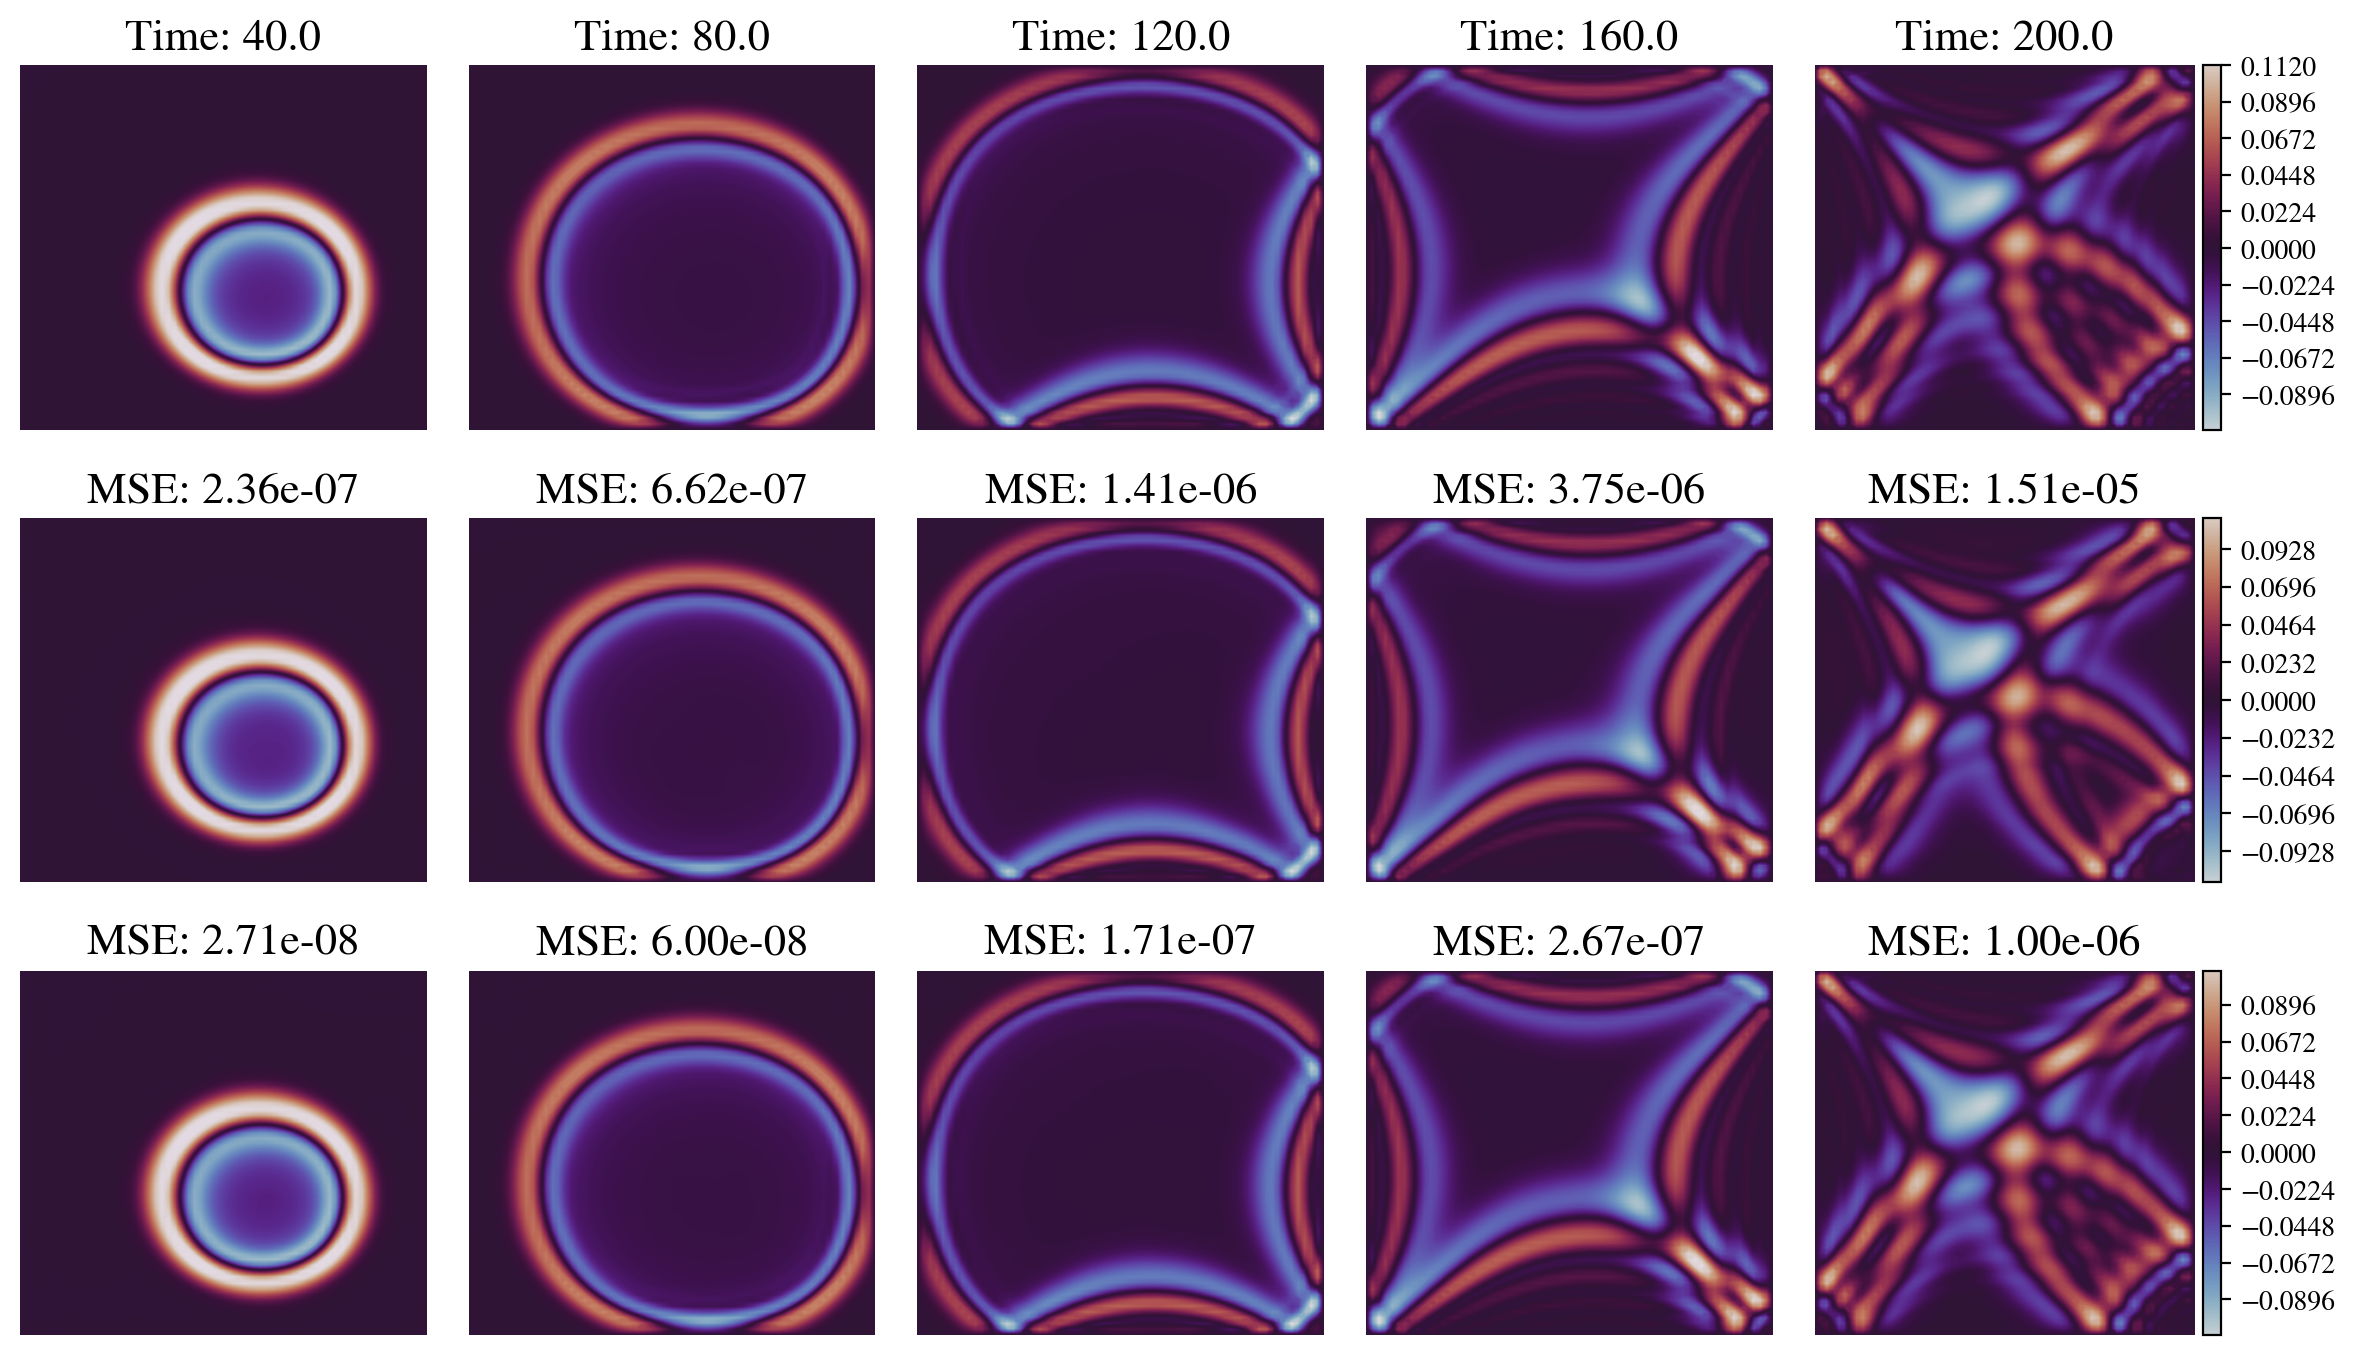

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

sample_id = 0
skip_t = 10
t_ls = np.linspace(0, 200, 51)
true = TRUE[sample_id, ::skip_t][1:]
pred1 = PRED[sample_id, ::skip_t][1:]
pred2 = PRED_rba[sample_id, ::skip_t][1:]
time_ls = t_ls[::skip_t][1:]

CMAP = 'twilight'

# MSE function
def mse(a, b):
    return np.mean((a - b) ** 2)

# Global color scale from ground truth
vmin = -np.min([np.abs(true.min()),true.max()])
vmax = np.min([np.abs(true.min()),true.max()])
norm = Normalize(vmin=vmin, vmax=vmax)

fig, axes = plt.subplots(3, 5, figsize=(12, 7), constrained_layout=False)

for i in range(5):
    # --- Ground truth ---
    im0 = axes[0, i].contourf(true[i], 300, norm=norm, cmap=CMAP)
    axes[0, i].set_title(f'Time: {time_ls[i]:.1f}', fontsize=16)
    axes[0, i].axis('off')

    # --- FNO prediction ---
    im1 = axes[1, i].contourf(pred1[i], 300, norm=norm, cmap=CMAP)
    axes[1, i].set_title(f'MSE: {mse(true[i], pred1[i]):.2e}', fontsize=16)
    axes[1, i].axis('off')

    # --- RBA_s prediction ---
    im2 = axes[2, i].contourf(pred2[i], 300, norm=norm, cmap=CMAP)
    axes[2, i].set_title(f'MSE: {mse(true[i], pred2[i]):.2e}', fontsize=16)
    axes[2, i].axis('off')

# Add colorbars to the last column only
for row, im in enumerate([im0, im1, im2]):
    cbar = plt.colorbar(im, ax=axes[row, 4], fraction=0.046, pad=0.02)
    cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.savefig('all_Frames_fixed.png',dpi=300)
plt.show()


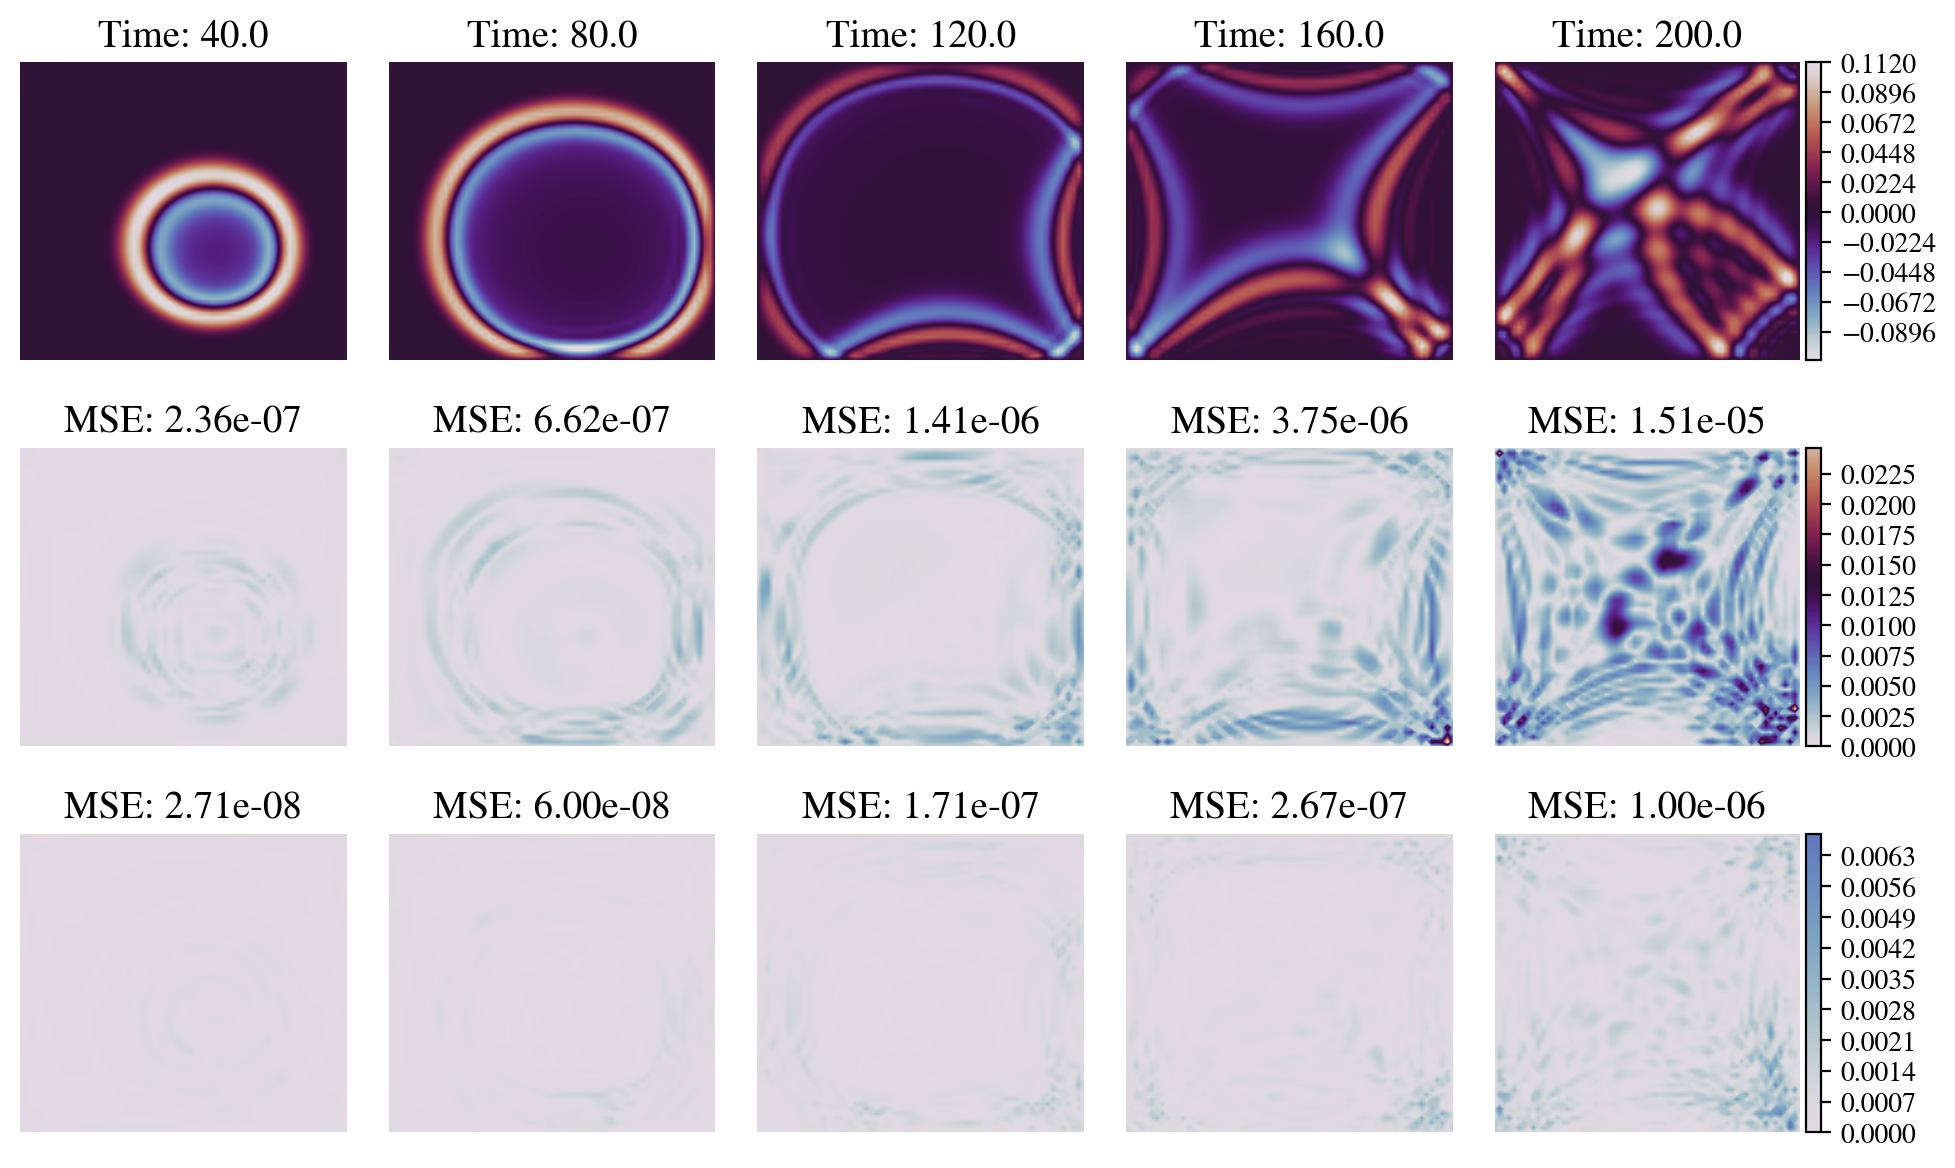

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

sample_id = 0
skip_t = 10
t_ls = np.linspace(0, 200, 51)
true = TRUE[sample_id, ::skip_t][1:]
pred1 = PRED[sample_id, ::skip_t][1:]
pred2 = PRED_rba[sample_id, ::skip_t][1:]
time_ls = t_ls[::skip_t][1:]

CMAP = 'twilight'
fontsize=14
# MSE function
def mae(a, b):
    return np.mean(np.abs(a - b)**2)

# Global color scale from ground truth
vmin = np.min(np.abs(pred1-true))
vmax = np.max(np.abs(pred1-true))
norm = Normalize(vmin=vmin, vmax=vmax)

fig, axes = plt.subplots(3, 5, figsize=(10, 6), constrained_layout=False)

for i in range(5):
    # --- Ground truth ---
    im0 = axes[0, i].contourf(true[i], 300,vmin=-np.max(np.abs(true[i])),vmax=np.max(np.abs(true[i])), cmap=CMAP)
    axes[0, i].set_title(f'Time: {time_ls[i]:.1f}', fontsize=fontsize)
    axes[0, i].axis('off')

    # --- FNO prediction ---
    im1 = axes[1, i].contourf(np.abs(pred1[i]-true[i]), 300,vmin=vmin,vmax=vmax, cmap=CMAP)
    axes[1, i].set_title(f'MSE: {mae(true[i], pred1[i]):.2e}', fontsize=fontsize)
    axes[1, i].axis('off')

    # --- RBA_s prediction ---
    im2 = axes[2, i].contourf(np.abs(pred2[i]-true[i]), 300, vmin=vmin,vmax=vmax, cmap=CMAP)
    axes[2, i].set_title(f'MSE: {mae(true[i], pred2[i]):.2e}', fontsize=fontsize)
    axes[2, i].axis('off')

# Add colorbars to the last column only
for row, im in enumerate([im0, im1, im2]):
    cbar = plt.colorbar(im, ax=axes[row, 4], fraction=0.046, pad=0.02)
    cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.savefig('all_Frames_errors.png',dpi=300)
plt.show()


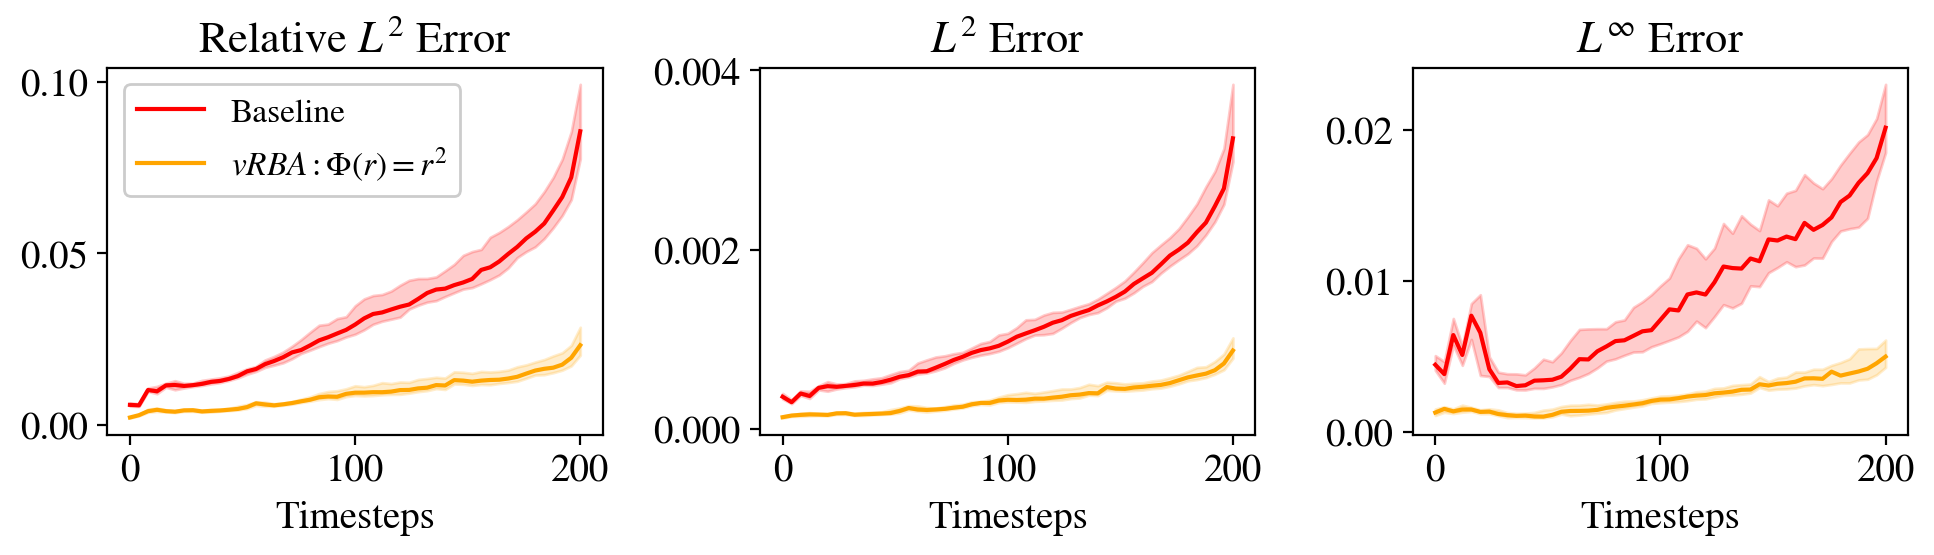

In [16]:
from scipy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

# --- Your Original Code for Data Prep & Relative L2 Error ---
# (Assuming TRUE, PRED, PRED_rba are loaded)
TRUE_flat = TRUE.reshape(TRUE.shape[0], TRUE.shape[1], -1)
PRED_flat = PRED.reshape(PRED.shape[0], PRED.shape[1], -1)
PRED_rba_flat = PRED_rba.reshape(PRED_rba.shape[0], PRED_rba.shape[1], -1)

# Compute relative L2 error for each sample and time step (your original loops)
err = np.array([
    [norm(PRED_flat[i, j] - TRUE_flat[i, j]) / norm(TRUE_flat[i, j]) if norm(TRUE_flat[i, j]) != 0 else 0
     for j in range(TRUE.shape[1])]
    for i in range(TRUE.shape[0])
])

err_rba = np.array([
    [norm(PRED_rba_flat[i, j] - TRUE_flat[i, j]) / norm(TRUE_flat[i, j]) if norm(TRUE_flat[i, j]) != 0 else 0
     for j in range(TRUE.shape[1])]
    for i in range(TRUE.shape[0])
])

# Compute percentiles for relative L2 error (your original calculations)
percentile_25_err = np.percentile(err, 25, axis=0)
percentile_50_err = np.percentile(err, 50, axis=0)
percentile_75_err = np.percentile(err, 75, axis=0)

percentile_25_err_rba = np.percentile(err_rba, 25, axis=0)
percentile_50_err_rba = np.percentile(err_rba, 50, axis=0)
percentile_75_err_rba = np.percentile(err_rba, 75, axis=0)

# Time steps
timesteps = np.linspace(0, 200, TRUE.shape[1])

# --- ADDED: Calculate L2 and L-infinity Error Norms ---
# For efficiency, these new calculations are vectorized. 🚀

# Absolute L2 error norm: ||y_pred - y_true||_2
l2_err_abs =np.sqrt(np.mean((PRED_flat - TRUE_flat)**2,axis=2))
l2_err_abs_rba =np.sqrt(np.mean((PRED_rba_flat - TRUE_flat)**2,axis=2) )
# Absolute L-infinity error norm: ||y_pred - y_true||_inf
linf_err_abs = np.max(np.abs(PRED_flat - TRUE_flat), axis=2)
linf_err_abs_rba = np.max(np.abs(PRED_rba_flat - TRUE_flat), axis=2)


# --- ADDED: Compute Statistics for New Metrics ---
p50_l2_abs = np.percentile(l2_err_abs, 50, axis=0)
p25_l2_abs = np.percentile(l2_err_abs, 25, axis=0)
p75_l2_abs = np.percentile(l2_err_abs, 75, axis=0)
p50_l2_abs_rba = np.percentile(l2_err_abs_rba, 50, axis=0)
p25_l2_abs_rba = np.percentile(l2_err_abs_rba, 25, axis=0)
p75_l2_abs_rba = np.percentile(l2_err_abs_rba, 75, axis=0)

p50_linf_abs = np.percentile(linf_err_abs, 50, axis=0)
p25_linf_abs = np.percentile(linf_err_abs, 25, axis=0)
p75_linf_abs = np.percentile(linf_err_abs, 75, axis=0)
p50_linf_abs_rba = np.percentile(linf_err_abs_rba, 50, axis=0)
p25_linf_abs_rba = np.percentile(linf_err_abs_rba, 25, axis=0)
p75_linf_abs_rba = np.percentile(linf_err_abs_rba, 75, axis=0)


# --- MODIFIED: Plotting in 3 Columns ---
fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=False)

# Plot 1: Relative L2 Error (using your original variables)
axs[0].plot(timesteps, percentile_50_err, color='red', label='Baseline')
axs[0].fill_between(timesteps, percentile_25_err, percentile_75_err, color='red', alpha=0.2)
axs[0].plot(timesteps, percentile_50_err_rba, color='orange', label=rf'$vRBA:\Phi(r)=r^2$')
axs[0].fill_between(timesteps, percentile_25_err_rba, percentile_75_err_rba, color='orange', alpha=0.2)
axs[0].set_title('Relative $L^2$ Error', fontsize=16)
#axs[0].set_yscale('log')

# Plot 2: Absolute L2 Error Norm
axs[1].plot(timesteps, p50_l2_abs, color='red', label='Baseline')
axs[1].fill_between(timesteps, p25_l2_abs, p75_l2_abs, color='red', alpha=0.2)
axs[1].plot(timesteps, p50_l2_abs_rba, color='orange', label=rf'$vRBA:\Phi(r)=r^2$')
axs[1].fill_between(timesteps, p25_l2_abs_rba, p75_l2_abs_rba, color='orange', alpha=0.2)
axs[1].set_title('$L^2$ Error ', fontsize=16)
#axs[1].set_yscale('log')

# Plot 3: Absolute L-infinity Error Norm
axs[2].plot(timesteps, p50_linf_abs, color='red', label='Baseline')
axs[2].fill_between(timesteps, p25_linf_abs, p75_linf_abs, color='red', alpha=0.2)
axs[2].plot(timesteps, p50_linf_abs_rba, color='orange', label=rf'$vRBA:\Phi(r)=r^2$')
axs[2].fill_between(timesteps, p25_linf_abs_rba, p75_linf_abs_rba, color='orange', alpha=0.2)
axs[2].set_title('$L^\infty$ Error', fontsize=16)
#axs[2].set_yscale('log')

# Common formatting for all subplots
for i,ax in enumerate(axs):
    ax.set_xlabel('Timesteps', fontsize=14)
    if i==0:
        #ax.set_ylabel('Error Value', fontsize=14)
        ax.legend(fontsize=12,framealpha=1)
    #ax.grid(True, which="both", ls="--", alpha=0.6)

plt.tight_layout()
plt.savefig('Error_Metrics_3_Plots.png', dpi=300)
plt.show()